In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 32})
plt.rcParams["figure.figsize"] = (12,8)
import torch
import numpy as np
import scipy.signal
import scipy.io
import pandas as pd
import itertools
from itertools import product
import os
from tqdm.notebook import tqdm, trange

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error as MSE, log_loss,r2_score
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression, LogisticRegressionCV
import seaborn as sns
import xgboost as xgb

## DATASET

In [4]:
storage_patrh = os.path.join(os.getcwd(),'feature_storage')
listfiles = os.listdir(storage_patrh)
list_featurestorage = [fname for fname in listfiles if fname.endswith(('csv','json')) ]
list_featurestorage

['kernels (1).json',
 'minirocket2500_train.csv',
 'minirocket2000_train.csv',
 'minirocket2000_test.csv',
 'minirocket2500_test.csv',
 'tsfel_train.csv',
 '103.csv',
 '102.csv',
 'EWT_features_train.json',
 'EWT_features_test_x.json',
 'tsfel_test.csv',
 'minirocket2000_Best_train.csv',
 'EWT_features_train_x.json',
 'minirocket2000_Best_test.csv',
 'EWT_features_test.json']

In [5]:
train_features_path = os.path.join(storage_patrh, 'EWT_features_train_x.json')
test_features_path  = os.path.join(storage_patrh, 'EWT_features_test_x.json')

In [6]:
df_train = pd.read_json(train_features_path, orient='values')
df_test  = pd.read_json(test_features_path, orient='values' )

In [7]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,2650,2651,2652,2653,2654,2655,2656,2657,2658,2659
0,0.001019,0.000673,-1.100362,0.381450,0.000901,0.000328,0.001176,-1.024087,0.034677,0.000313,...,0.019093,0.000328,0.114211,4.932287,0.072332,-0.000416,{'imag': 0.001764995},-0.999081,0.056813,0.000024
1,0.001066,0.000615,-0.398603,0.493984,0.001009,-0.000067,0.001229,-1.004608,-0.287171,0.000083,...,0.019098,-0.000067,0.113433,4.897280,-0.016554,-0.000258,{'imag': 0.0017411493},-0.999097,0.056306,0.000023
2,0.001189,0.000910,-1.501692,0.206836,0.001028,-0.001002,0.001113,-1.545785,-0.017717,-0.001028,...,0.019047,-0.001002,0.113605,4.856965,-0.109053,-0.000311,{'imag': 0.0017036499},-0.999065,0.056343,0.000024
3,0.001072,0.000586,-0.613070,0.088491,0.001086,-0.000237,0.001199,-1.225718,0.063591,-0.000240,...,0.019095,-0.000237,0.112926,4.651605,-0.009311,-0.000291,{'imag': 0.0015969529},-0.999103,0.055909,0.000023
4,0.000907,0.000587,-0.486390,0.509356,0.000824,0.000198,0.001062,-0.783760,-0.040336,0.000304,...,0.019119,0.000198,0.112818,4.706476,0.051310,-0.000470,{'imag': 0.0014903081000000001},-0.999103,0.055871,0.000023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000934,0.000522,-0.309624,0.483219,0.000872,-0.000509,0.000941,-0.862055,0.281264,-0.000658,...,0.027109,-0.000509,0.092333,4.620426,-0.135283,0.000089,{'imag': 0.0045566121},-0.995532,0.059053,0.000076
49996,0.001798,0.001122,-0.571744,0.373875,0.001767,0.001617,0.001370,-0.408444,-0.175270,0.001767,...,0.027114,0.001617,0.092927,4.697106,0.186402,-0.000067,{'imag': -0.0085728122},-0.995725,0.059376,0.000074
49997,0.000916,0.000715,1.390481,1.156151,0.000817,0.000269,0.001131,0.146330,0.176279,0.000222,...,0.027122,0.000269,0.092717,4.708612,0.014174,-0.000008,{'imag': -0.0081013162},-0.995521,0.059311,0.000077
49998,0.001622,0.001938,3.485100,1.997867,0.001009,-0.000923,0.002353,1.857543,-1.544369,-0.000089,...,0.027055,-0.000923,0.092848,4.705948,-0.165701,0.000020,{'imag': -0.0045986469},-0.994649,0.059433,0.000092


In [8]:
df_train.columns

RangeIndex(start=0, stop=2660, step=1)

In [9]:
idx2remove = [df_train.shape[1]-1]

for d in df_train.columns :
    if df_train[d].dtype == object:
        idx2remove +=[d]
        
df_train = df_train.drop(columns = idx2remove)
df_test  = df_test.drop(columns = idx2remove)

In [10]:
idx2remove

[2659,
 10,
 24,
 38,
 52,
 66,
 80,
 94,
 108,
 122,
 136,
 150,
 164,
 178,
 192,
 206,
 220,
 234,
 248,
 262,
 276,
 290,
 304,
 318,
 332,
 346,
 360,
 374,
 388,
 402,
 416,
 430,
 444,
 458,
 472,
 486,
 500,
 514,
 528,
 542,
 556,
 570,
 584,
 598,
 612,
 626,
 640,
 654,
 668,
 682,
 696,
 710,
 724,
 738,
 752,
 766,
 780,
 794,
 808,
 822,
 836,
 850,
 864,
 878,
 892,
 906,
 920,
 934,
 948,
 962,
 976,
 990,
 1004,
 1018,
 1032,
 1046,
 1060,
 1074,
 1088,
 1102,
 1116,
 1130,
 1144,
 1158,
 1172,
 1186,
 1200,
 1214,
 1228,
 1242,
 1256,
 1270,
 1284,
 1298,
 1312,
 1326,
 1340,
 1354,
 1368,
 1382,
 1396,
 1410,
 1424,
 1438,
 1452,
 1466,
 1480,
 1494,
 1508,
 1522,
 1536,
 1550,
 1564,
 1578,
 1592,
 1606,
 1620,
 1634,
 1648,
 1662,
 1676,
 1690,
 1704,
 1718,
 1732,
 1746,
 1760,
 1774,
 1788,
 1802,
 1816,
 1830,
 1844,
 1858,
 1872,
 1886,
 1900,
 1914,
 1928,
 1942,
 1956,
 1970,
 1984,
 1998,
 2012,
 2026,
 2040,
 2054,
 2068,
 2082,
 2096,
 2110,
 2124,
 2138,


In [11]:
X_train = df_train.values.real
y_train = np.arange(40).repeat(1250)

X_test = df_test.values.real
y_test = np.arange(40).repeat(1250) 

In [12]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2648,2649,2650,2651,2652,2653,2654,2655,2657,2658
0,0.000570,0.000334,-0.934421,0.294847,0.000486,0.000065,0.000658,-0.969982,-0.220200,0.000200,...,3.012099,2.129846,0.019226,0.000065,0.114660,4.275787,-0.002670,0.000067,-0.998896,0.054714
1,0.000704,0.000369,-0.818785,-0.039975,0.000784,0.000199,0.000769,-1.446871,-0.003455,0.000183,...,3.133376,2.153052,0.019275,0.000199,0.114781,4.377378,0.007706,0.000117,-0.998945,0.054818
2,0.000575,0.000280,-0.871813,-0.043394,0.000610,-0.000082,0.000634,-1.382252,0.031358,-0.000115,...,2.860940,2.099128,0.019271,-0.000082,0.113995,4.134662,-0.044672,0.000020,-0.998924,0.054266
3,0.000687,0.000332,-0.914894,-0.224000,0.000720,0.000024,0.000762,-1.430748,0.112679,0.000027,...,2.859101,2.098889,0.019252,0.000024,0.113958,4.133286,0.019480,0.000020,-0.998892,0.054265
4,0.000587,0.000363,-1.048808,0.347204,0.000518,0.000204,0.000660,-1.362465,0.188041,-0.000033,...,2.953392,2.116472,0.019213,0.000204,0.114261,4.216110,0.026695,-0.000179,-0.998907,0.054464


In [13]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,2648,2649,2650,2651,2652,2653,2654,2655,2657,2658
0,0.001019,0.000673,-1.100362,0.381450,0.000901,0.000328,0.001176,-1.024087,0.034677,0.000313,...,3.715882,2.275501,0.019093,0.000328,0.114211,4.932287,0.072332,-0.000416,-0.999081,0.056813
1,0.001066,0.000615,-0.398603,0.493984,0.001009,-0.000067,0.001229,-1.004608,-0.287171,0.000083,...,3.707687,2.267965,0.019098,-0.000067,0.113433,4.897280,-0.016554,-0.000258,-0.999097,0.056306
2,0.001189,0.000910,-1.501692,0.206836,0.001028,-0.001002,0.001113,-1.545785,-0.017717,-0.001028,...,3.659752,2.258741,0.019047,-0.001002,0.113605,4.856965,-0.109053,-0.000311,-0.999065,0.056343
3,0.001072,0.000586,-0.613070,0.088491,0.001086,-0.000237,0.001199,-1.225718,0.063591,-0.000240,...,3.419193,2.216091,0.019095,-0.000237,0.112926,4.651605,-0.009311,-0.000291,-0.999103,0.055909
4,0.000907,0.000587,-0.486390,0.509356,0.000824,0.000198,0.001062,-0.783760,-0.040336,0.000304,...,3.494924,2.227151,0.019119,0.000198,0.112818,4.706476,0.051310,-0.000470,-0.999103,0.055871


In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## MODELS

In [16]:
def balanced_split(X,y,train_ratio = 0.1):
    arg_idx = np.argsort(y)
    y = np.atleast_2d(y[arg_idx]).T
    X = X[arg_idx]
    
    clss, counts = np.unique(y, return_counts = True)
    
    n_vals  = (counts*(1-train_ratio)).astype(int)
    n_tarin = (counts*train_ratio).astype(int)
    
    x_val   = np.zeros((np.sum(n_vals),  X.shape[1]))
    x_train = np.zeros((np.sum(n_tarin), X.shape[1]))
    y_val   = np.zeros((np.sum(n_vals),  y.shape[1]))
    y_train = np.zeros((np.sum(n_tarin), y.shape[1]))    

    counts_  = np.concatenate([[0], np.cumsum(counts)])
    n_vals_  = np.concatenate([[0], np.cumsum(n_vals)])
    n_tarin_ = np.concatenate([[0], np.cumsum(n_tarin)])

    idxs_train = np.column_stack((counts_[:-1],
                                  counts_[1:]-n_vals,
                                  n_tarin_[:-1],
                                  n_tarin_[1:]))
    
    idxs_val   = np.column_stack((counts_[:-1]+n_tarin,
                                  counts_[1:],
                                  n_vals_[:-1],
                                  n_vals_[1:]))

    for i in range(counts.size):
        x_val  [idxs_val  [i,2]:idxs_val  [i,3],:] = X[idxs_val  [i,0]:idxs_val[i,1],:]
        x_train[idxs_train[i,2]:idxs_train[i,3],:] = X[idxs_train[i,0]:idxs_train[i,1],:]
        y_val  [idxs_val  [i,2]:idxs_val  [i,3],:] = y[idxs_val  [i,0]:idxs_val[i,1],:]
        y_train[idxs_train[i,2]:idxs_train[i,3],:] = y[idxs_train[i,0]:idxs_train[i,1],:]        
    
    return x_train, x_val, y_train.squeeze(), y_val.squeeze()

X_train_, X_val_, y_train_, y_val_ = balanced_split(X_train,y_train,train_ratio = 0.3)
X_train_.shape, X_val_.shape, y_train_.shape, y_val_.shape

tols = np.concatenate([np.arange(0,1e-3,1e-4), np.arange(1e-3,1e-2,1e-3), np.arange(1e-2,1e-1,1e-2), np.arange(1e-1,1e-0,0.5e-1)])
val_score = np.zeros(tols.size)
train_score = np.zeros(tols.size)
train_1_score = np.zeros(tols.size)
test_score = np.zeros(tols.size)

for i,tol in enumerate(tols):
    model = LinearDiscriminantAnalysis(solver='svd',
                                       shrinkage=None,
                                       priors=None,
                                       n_components=None,
                                       store_covariance=100,
                                       tol=tol,
                                       covariance_estimator=None,)
    model.fit(X_train_,y_train_)
    val_score[i]     = model.score(X_val_,y_val_)
    train_score[i]   = model.score(X_train_,y_train_)
    train_1_score[i] = model.score(X_train,y_train)
    test_score[i]    = model.score(X_test,y_test)
    
    print(f"tol={tol:.4f}: Accuracy for test: {test_score[i]:.3f}, train_:{train_score[i]:.3f}, val:{val_score[i]:.4f}, train:{train_1_score[i]:.5f}")
    
    
tol = tols[np.argmax(val_score)]
print(f'max_val_score {val_score[np.argmax(val_score)]}, best tol = {tol}')

tol=0.0000: Accuracy for test: 0.891,Accuracy for train_:1.000, val:0.9393, train:0.95748
tol=0.0001: Accuracy for test: 0.886,Accuracy for train_:1.000, val:0.9491, train:0.96432
tol=0.0002: Accuracy for test: 0.894,Accuracy for train_:1.000, val:0.9521, train:0.96648
tol=0.0003: Accuracy for test: 0.900,Accuracy for train_:1.000, val:0.9482, train:0.96372
tol=0.0004: Accuracy for test: 0.903,Accuracy for train_:1.000, val:0.9489, train:0.96424
tol=0.0005: Accuracy for test: 0.902,Accuracy for train_:1.000, val:0.9498, train:0.96482
tol=0.0006: Accuracy for test: 0.901,Accuracy for train_:1.000, val:0.9499, train:0.96494
tol=0.0007: Accuracy for test: 0.901,Accuracy for train_:1.000, val:0.9459, train:0.96208
tol=0.0008: Accuracy for test: 0.901,Accuracy for train_:1.000, val:0.9455, train:0.96182
tol=0.0009: Accuracy for test: 0.902,Accuracy for train_:1.000, val:0.9461, train:0.96224
tol=0.0010: Accuracy for test: 0.904,Accuracy for train_:1.000, val:0.9459, train:0.96208
tol=0.0020

In [18]:

knn     = KNeighborsClassifier(n_neighbors=1)

randomForest  = RandomForestClassifier(random_state=42,n_estimators=100,max_depth=None,)
adaBoost = AdaBoostClassifier(random_state=42)
lda = LinearDiscriminantAnalysis(tol  = tol)
nb       = GaussianNB()

logreg = LogisticRegression()

models =  ((lda,"Linear Discriminant Analysis"),
           (logreg,"Logistic Regression"),
           (nb,"Naive Bayes Classifier"),
#            (knn,"KNN Classifier"),
           (randomForest,"Random Forest Classifier"),)

## FULL MODEL

In [19]:
for model,name in models:
    print(name)
    model.fit(X_train,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test,y_test)},Accuracy for train: {model.score(X_train,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.94936,Accuracy for train: 0.99848
Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test: Logistic Regression:	 0.65444,Accuracy for train: 0.9933
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.81382,Accuracy for train: 0.98536
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.8829,Accuracy for train: 1.0


Accuracy of Linear Discriminant Analysis:	 0.94936


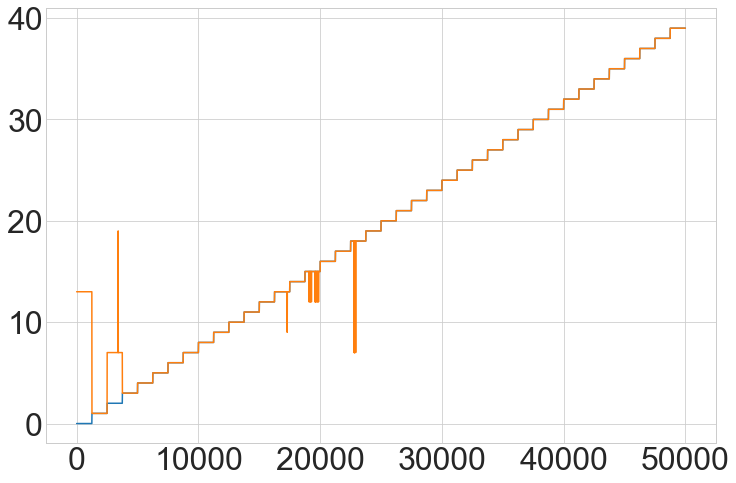

In [59]:
clf_id = 0
predicts = models[clf_id][0].predict(X_test)

plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models[clf_id][0].score(X_test,y_test)}")

In [61]:
df_ewt_lda = pd.DataFrame(predicts)
df_ewt_lda.to_csv('EWT_LDA_TOLx.csv')

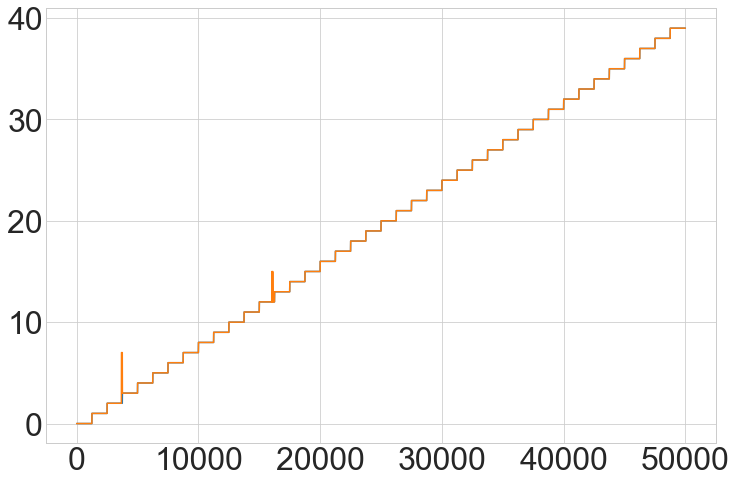

In [21]:
predicts = models[0][0].predict(X_train)
plt.plot(y_train)
plt.plot(predicts)

## CORRELATION BASED FEATURE SELECTION

In [22]:
df_all = df_train.copy()
print(df_all.shape)

if 'source' in df_all.columns:
    df_all = df_all.drop(columns='source')

# Create correlation matrix
corr_matrix = df_all.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df_train.drop(to_drop, axis=1, inplace=True)
df_test.drop(to_drop, axis=1, inplace=True)
print(df_train.shape, df_test.shape,)

(50000, 2469)


/var/folders/dh/w_5f2j092jx9x__dkcvvrpw80000gn/T/ipykernel_38634/2613237418.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


(50000, 781) (50000, 781)


In [23]:
X_train_ = df_train.astype('float32').values
X_test_ = df_test.astype('float32').values
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train_)
X_test_  = scaler.transform(X_test_)

In [24]:
from copy import deepcopy
models_ = deepcopy(models)

for model,name in models_:
    print(name)
    model.fit(X_train_,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test_,y_test)},Accuracy for train: {model.score(X_train_,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.93158,Accuracy for train: 0.9979
Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test: Logistic Regression:	 0.51378,Accuracy for train: 0.98534
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.63946,Accuracy for train: 0.94466
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.68352,Accuracy for train: 1.0


## CORRELATION + RF FEATURE IMPORTANCE BASED FEATURE SELECTION 

In [25]:
featuresrf = models_[-1][0].feature_importances_
print(featuresrf.shape)

(781,)


In [26]:
featuresrf = models_[-1][0].feature_importances_
print(featuresrf.shape)
idx4rest = np.where(featuresrf>0.2*featuresrf.max())#0.023=0.32
# print(df_train.columns[:-1][idx4rest])
X_train__ = X_train_[:,idx4rest[0]]
X_test__  = X_test_ [:,idx4rest[0]]
print(X_train__.shape)

(781,)
(50000, 17)


In [27]:
models__ = deepcopy(models)

for model,name in models__:
    print(name)
    model.fit(X_train__,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test__,y_test)},Accuracy for train: {model.score(X_train__,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.91026,Accuracy for train: 0.98586
Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test: Logistic Regression:	 0.67066,Accuracy for train: 0.96172
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.88844,Accuracy for train: 0.98744
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.87822,Accuracy for train: 1.0


## RF FEATURE IMPORTANCE BASED FEATURE SELECTION 

In [28]:
featuresrf = models[-1][0].feature_importances_
print(featuresrf.shape)
idx4rest = np.where(featuresrf>0.2*featuresrf.max())#0.023=0.32
# print(df_train.columns[:-1][idx4rest])
X_train__ = X_train[:,idx4rest[0]]
X_test__  = X_test[:,idx4rest[0]]
print(X_train__.shape)

(2469,)
(50000, 133)


In [29]:
models__ = deepcopy(models)

for model,name in models__:
    print(name)
    model.fit(X_train__,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test__,y_test)},Accuracy for train: {model.score(X_train__,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.93074,Accuracy for train: 0.99776
Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test: Logistic Regression:	 0.87954,Accuracy for train: 0.98698
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.91534,Accuracy for train: 0.995
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.919,Accuracy for train: 1.0


Accuracy of Random Forest Classifier:	 0.919


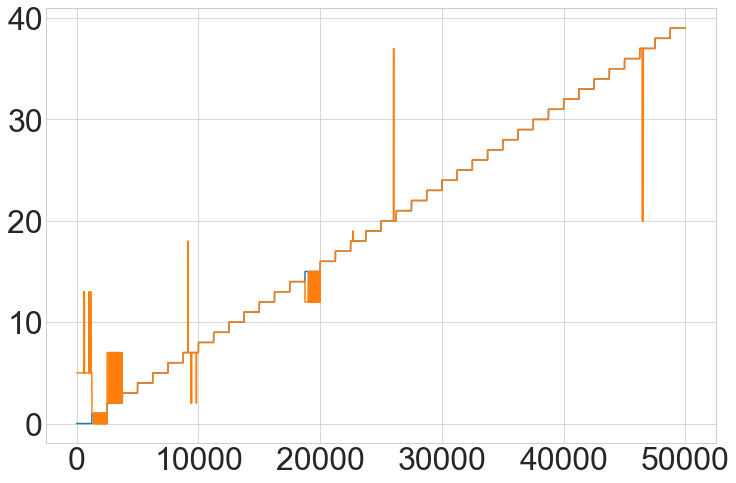

In [30]:
clf_id = -1
predicts = models__[clf_id][0].predict(X_test__)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__[clf_id][0].score(X_test__,y_test)}")

Accuracy of Naive Bayes Classifier:	 0.91534


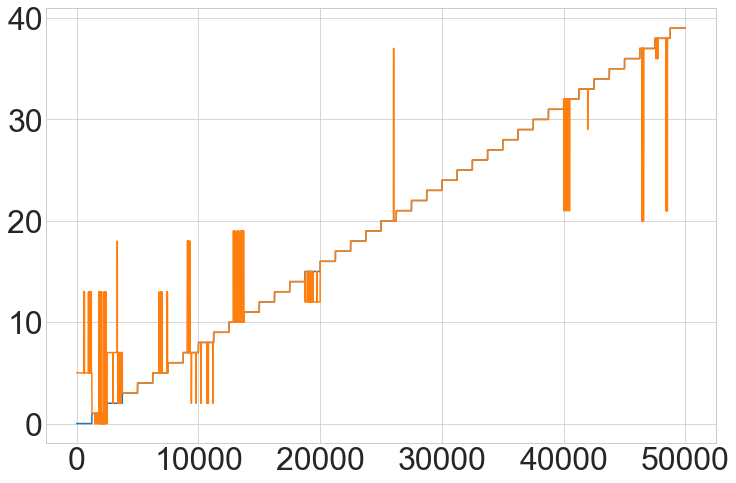

In [31]:
clf_id = -2
predicts = models__[clf_id][0].predict(X_test__)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__[clf_id][0].score(X_test__,y_test)}")

Accuracy of Logistic Regression:	 0.87954


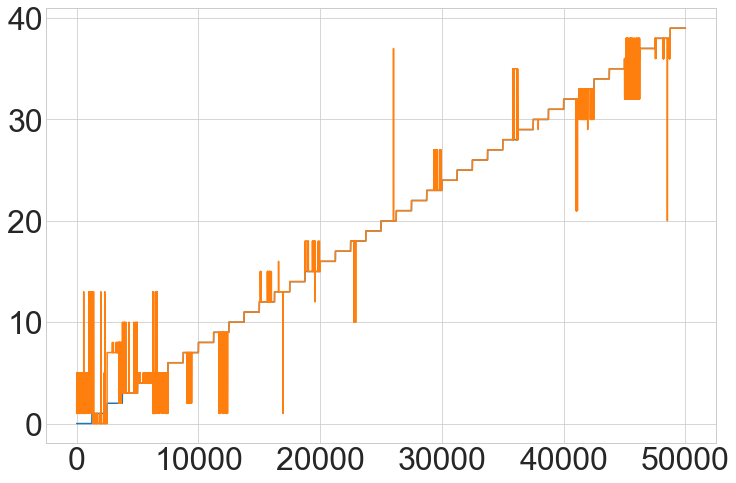

In [32]:
clf_id = -3
predicts = models__[clf_id][0].predict(X_test__)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__[clf_id][0].score(X_test__,y_test)}")

Accuracy of Linear Discriminant Analysis:	 0.93074


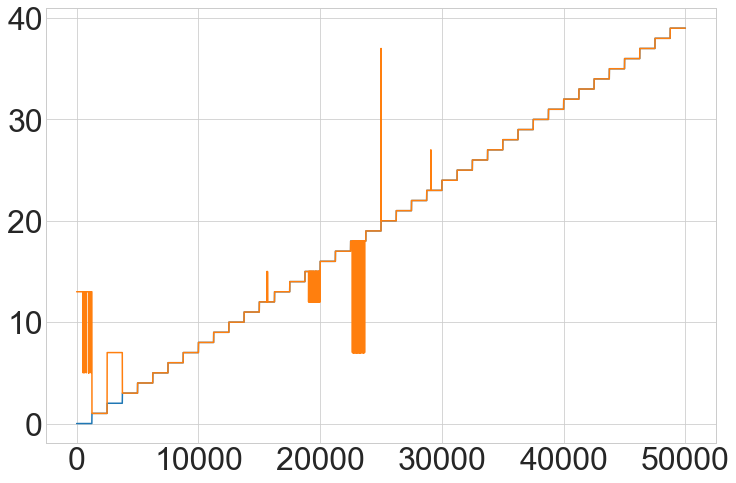

In [33]:
clf_id = -4
predicts = models__[clf_id][0].predict(X_test__)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__[clf_id][0].score(X_test__,y_test)}")

## ANOVA AND OTHER

In [35]:
from sklearn.feature_selection import SelectKBest, RFECV,RFE, VarianceThreshold, SelectFromModel
from sklearn.feature_selection import f_classif,  chi2,  mutual_info_classif 

# Create an SelectKBest object to select features with two best ANOVA F-Values
fselector = SelectKBest(chi2, k=10)
fselector = SelectKBest(f_classif, k=int(X_train.shape[1]*0.75))
# fselector = SelectKBest(mutual_info_classif, k=18)
# fselector = VarianceThreshold(threshold=.034)
# fselector = RFECV(estimator=models[0][0], step=1, scoring='neg_mean_squared_error')
# fselector = RFE(estimator=models[0][0], step=1)
# fselector = SelectFromModel(estimator=models[0][0],norm_order=25)

# Apply the SelectKBest object to the features and target
fselector.fit(X_train, y_train)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [122 135 174 213] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=1851)

In [36]:
X_train_1 = fselector.transform(X_train)
X_test_1  = fselector.transform(X_test)
X_train_1.shape

(50000, 1851)

In [37]:
models_1 = deepcopy(models)

for model,name in models_1:
    print(name)
    model.fit(X_train_1,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test_1,y_test)},Accuracy for train: {model.score(X_train_1,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.94436,Accuracy for train: 0.99852
Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test: Logistic Regression:	 0.6747,Accuracy for train: 0.98954
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.82874,Accuracy for train: 0.98564
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.88398,Accuracy for train: 1.0


In [38]:
idx4rest

(array([  13,   14,   17,   19,   25,   26,   27,   30,   32,   38,   43,
          45,   51,  234,  247,  248,  251,  253,  259,  260,  261,  263,
         264,  266,  267,  272,  273,  274,  277,  285,  481,  482,  485,
         487,  488,  493,  495,  497,  498,  500,  501,  507,  703,  706,
         708,  709,  715,  716,  719,  745,  909,  910,  911,  914,  916,
         923,  927,  940, 1106, 1118, 1122, 1135, 1148, 1287, 1291, 1300,
        1304, 1313, 1317, 1456, 1460, 1469, 1473, 1475, 1486, 1499, 1612,
        1616, 1625, 1629, 1755, 1759, 1768, 1772, 1785, 1885, 1889, 1898,
        1902, 1915, 2002, 2006, 2015, 2019, 2021, 2028, 2032, 2106, 2110,
        2119, 2123, 2136, 2197, 2201, 2210, 2214, 2227, 2275, 2279, 2288,
        2292, 2301, 2305, 2340, 2344, 2353, 2357, 2366, 2370, 2392, 2396,
        2405, 2409, 2418, 2422, 2431, 2435, 2444, 2448, 2454, 2457, 2461,
        2467]),)

In [39]:
featuresrf = models[-1][0].feature_importances_
print(featuresrf.shape)
idx4rest = np.where(featuresrf>0.4*featuresrf.max())#0.023=0.32
# print(df_train.columns[:-1][idx4rest])
X_train__2 = X_train[:,idx4rest[0]]
X_test__2  = X_test[:,idx4rest[0]]
print(X_train__.shape)

(2469,)
(50000, 133)


In [40]:
models__2 = deepcopy(models)

for model,name in models__2:
    print(name)
    model.fit(X_train__2,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test__2,y_test)},Accuracy for train: {model.score(X_train__2,y_train)}")

Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.92992,Accuracy for train: 0.99608
Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test: Logistic Regression:	 0.90948,Accuracy for train: 0.99232
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.91852,Accuracy for train: 0.99506
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.91926,Accuracy for train: 1.0


Accuracy of Linear Discriminant Analysis:	 0.92992


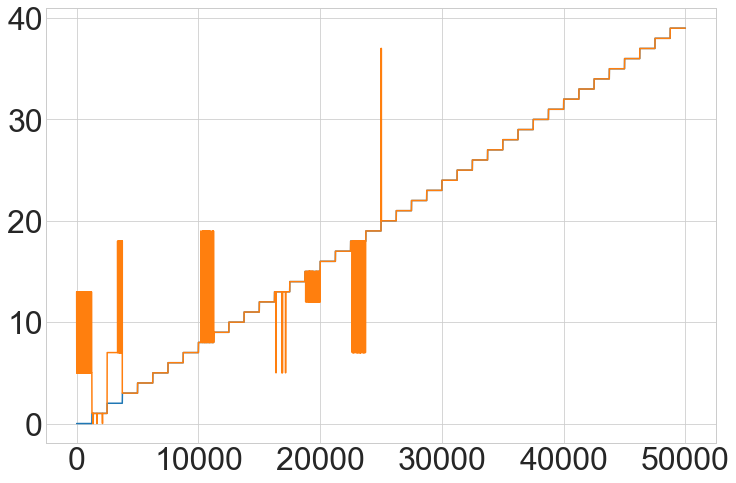

In [41]:
clf_id = -4
predicts = models__2[clf_id][0].predict(X_test__2)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__2[clf_id][0].score(X_test__2,y_test)}")

In [42]:
featuresrf = models[-1][0].feature_importances_
print(featuresrf.shape)
idx4rest = np.where(featuresrf>0.1*featuresrf.max())#0.023=0.32
# print(df_train.columns[:-1][idx4rest])
X_train__2 = X_train[:,idx4rest[0]]
X_test__2  = X_test[:,idx4rest[0]]
print(X_train__2.shape)
models__2 = deepcopy(models)

for model,name in models__2:
    print(name)
    model.fit(X_train__2,y_train)
    print(f"Accuracy for test: {name}:\t {model.score(X_test__2,y_test)},Accuracy for train: {model.score(X_train__2,y_train)}")

(2469,)
(50000, 220)
Linear Discriminant Analysis
Accuracy for test: Linear Discriminant Analysis:	 0.91544,Accuracy for train: 0.99784
Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for test: Logistic Regression:	 0.78844,Accuracy for train: 0.98134
Naive Bayes Classifier
Accuracy for test: Naive Bayes Classifier:	 0.91038,Accuracy for train: 0.9935
Random Forest Classifier
Accuracy for test: Random Forest Classifier:	 0.91448,Accuracy for train: 1.0


Accuracy of Linear Discriminant Analysis:	 0.91544


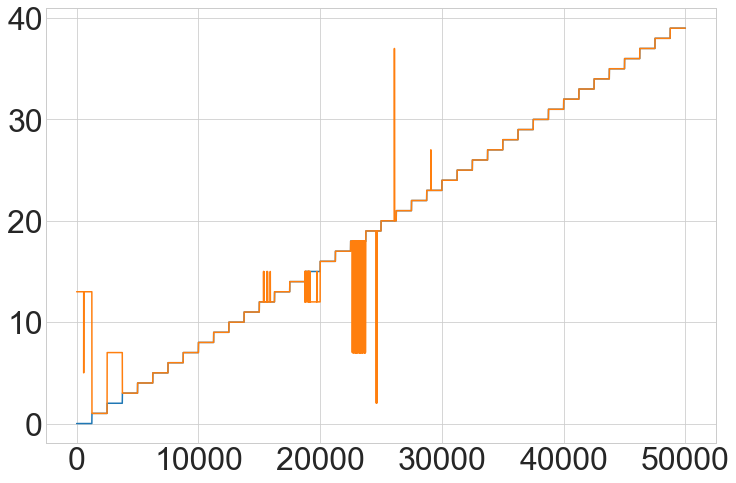

In [48]:
clf_id = 0
predicts = models__2[clf_id][0].predict(X_test__2)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__2[clf_id][0].score(X_test__2,y_test)}")

Accuracy of Naive Bayes Classifier:	 0.91038


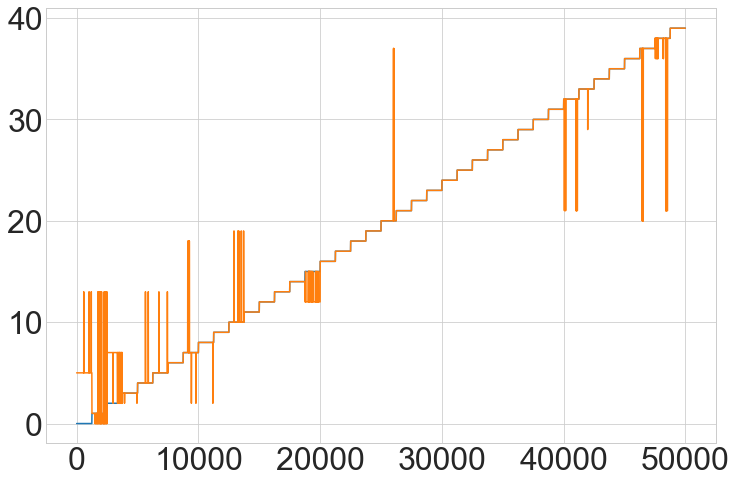

In [74]:
clf_id = -2
predicts = models__2[clf_id][0].predict(X_test__2)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy of {models[clf_id][1]}:\t {models__2[clf_id][0].score(X_test__2,y_test)}")

In [56]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [53]:
model = VotingClassifier(estimators=[('rf', models__2[-1][0]), 
                                     ('lda', models__2[0][0]), 
                                     ('nb', models__2[-2][0])],
                         voting = 'soft'
                        )
model.fit(X_train__2,y_train)
print(f"Accuracy for test:\t {model.score(X_test__2,y_test)},Accuracy for train: {model.score(X_train__2,y_train)}")

Accuracy for test:	 0.91346,Accuracy for train: 0.99812


In [82]:
# model = StackingClassifier(estimators=[('rf', models__2[-1][0]), 
#                                      ('lda', models__2[0][0]), 
#                                      ('nb', models__2[-2][0])],
#                            final_estimator=LinearDiscriminantAnalysis()
#                         )
def stacking(x,y):
    data = np.column_stack((
                    models__2[-1][0].predict(x),
                    models__2[-2][0].predict(x),
                    models__2[0 ][0].predict(x),
                    ))
    model = LinearDiscriminantAnalysis(tol = 1e-3)
#     model = RandomForestClassifier()
    model.fit(x,y)
    return model
model = stacking(X_train__2,y_train)
print(f"Accuracy for test:\t {model.score(X_test__2,y_test)},Accuracy for train: {model.score(X_train__2,y_train)}")

Accuracy for test:	 0.9129,Accuracy for train: 0.99848


Accuracy :	 0.9129


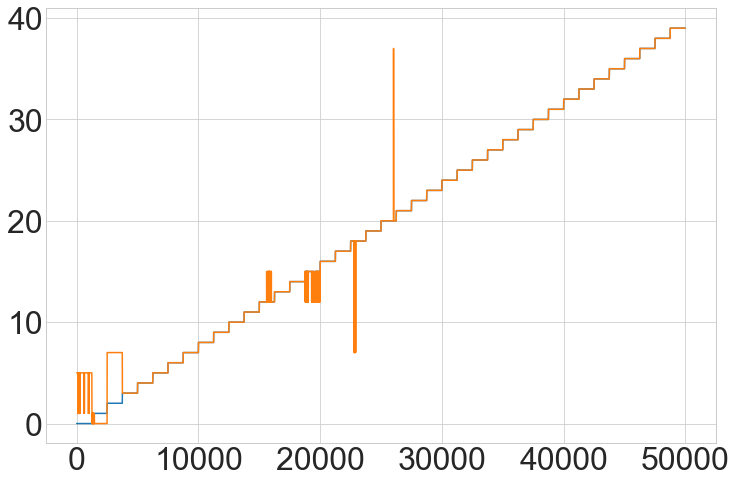

In [83]:
predicts = model.predict(X_test__2)
plt.plot(y_test)
plt.plot(predicts)
print(f"Accuracy :\t {model.score(X_test__2,y_test)}")

In [45]:
idx4rest

(array([  13,   14,   17,   19,   25,   26,   27,   30,   32,   38,   39,
          40,   43,   45,   51,  220,  225,  234,  238,  244,  247,  248,
         251,  253,  259,  260,  261,  263,  264,  266,  267,  272,  273,
         274,  277,  279,  285,  401,  468,  472,  478,  480,  481,  482,
         484,  485,  487,  488,  493,  494,  495,  497,  498,  500,  501,
         506,  507,  513,  699,  701,  702,  703,  706,  708,  709,  714,
         715,  716,  719,  721,  722,  728,  732,  741,  745,  758,  909,
         910,  911,  914,  916,  917,  923,  924,  927,  929,  930,  936,
         940,  951,  966, 1105, 1106, 1111, 1118, 1119, 1122, 1131, 1133,
        1135, 1148, 1286, 1287, 1288, 1289, 1291, 1300, 1304, 1306, 1313,
        1317, 1455, 1456, 1460, 1462, 1469, 1473, 1475, 1482, 1486, 1499,
        1611, 1612, 1616, 1625, 1629, 1638, 1642, 1754, 1755, 1756, 1759,
        1768, 1772, 1781, 1785, 1798, 1884, 1885, 1889, 1898, 1899, 1902,
        1904, 1911, 1915, 2002, 2003, 

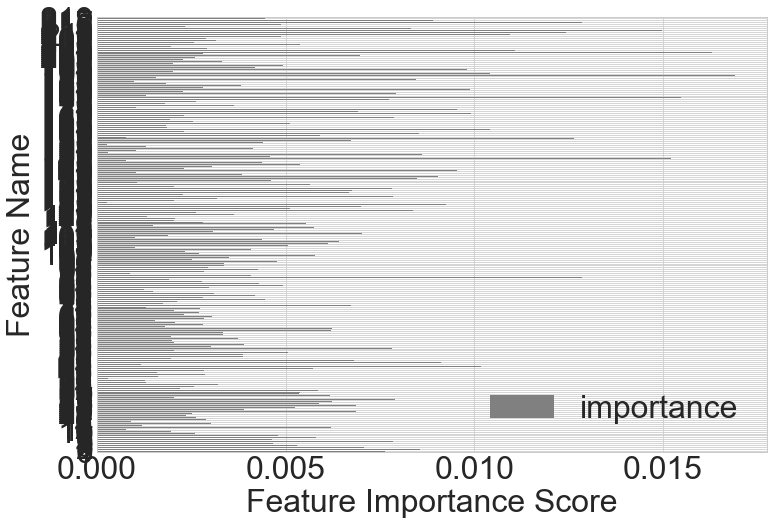

In [46]:
feat_imp = pd.DataFrame({'importance':models__2[-1][0].feature_importances_}) 

# feat_imp['feature'] = df_train.columns[:-1]

# feat_imp = feat_imp.set_index('feature', drop=True)

feat_imp.plot.barh(color='grey')
# plt.title("XGBoost feature importance")
plt.xlabel('Feature Importance Score', fontsize = 32)
plt.ylabel('Feature Name', fontsize = 32)
# plt.savefig('XGB_feautre_importance.pdf', dpi=120, format='pdf', bbox_inches='tight')
plt.show()